# 자동차 연비 예측 모델 개발

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

In [5]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


# 결측치가 있는 row를 확인해서 결측치와 대조되는 컬럼의 데이터를 확인

<Axes: >

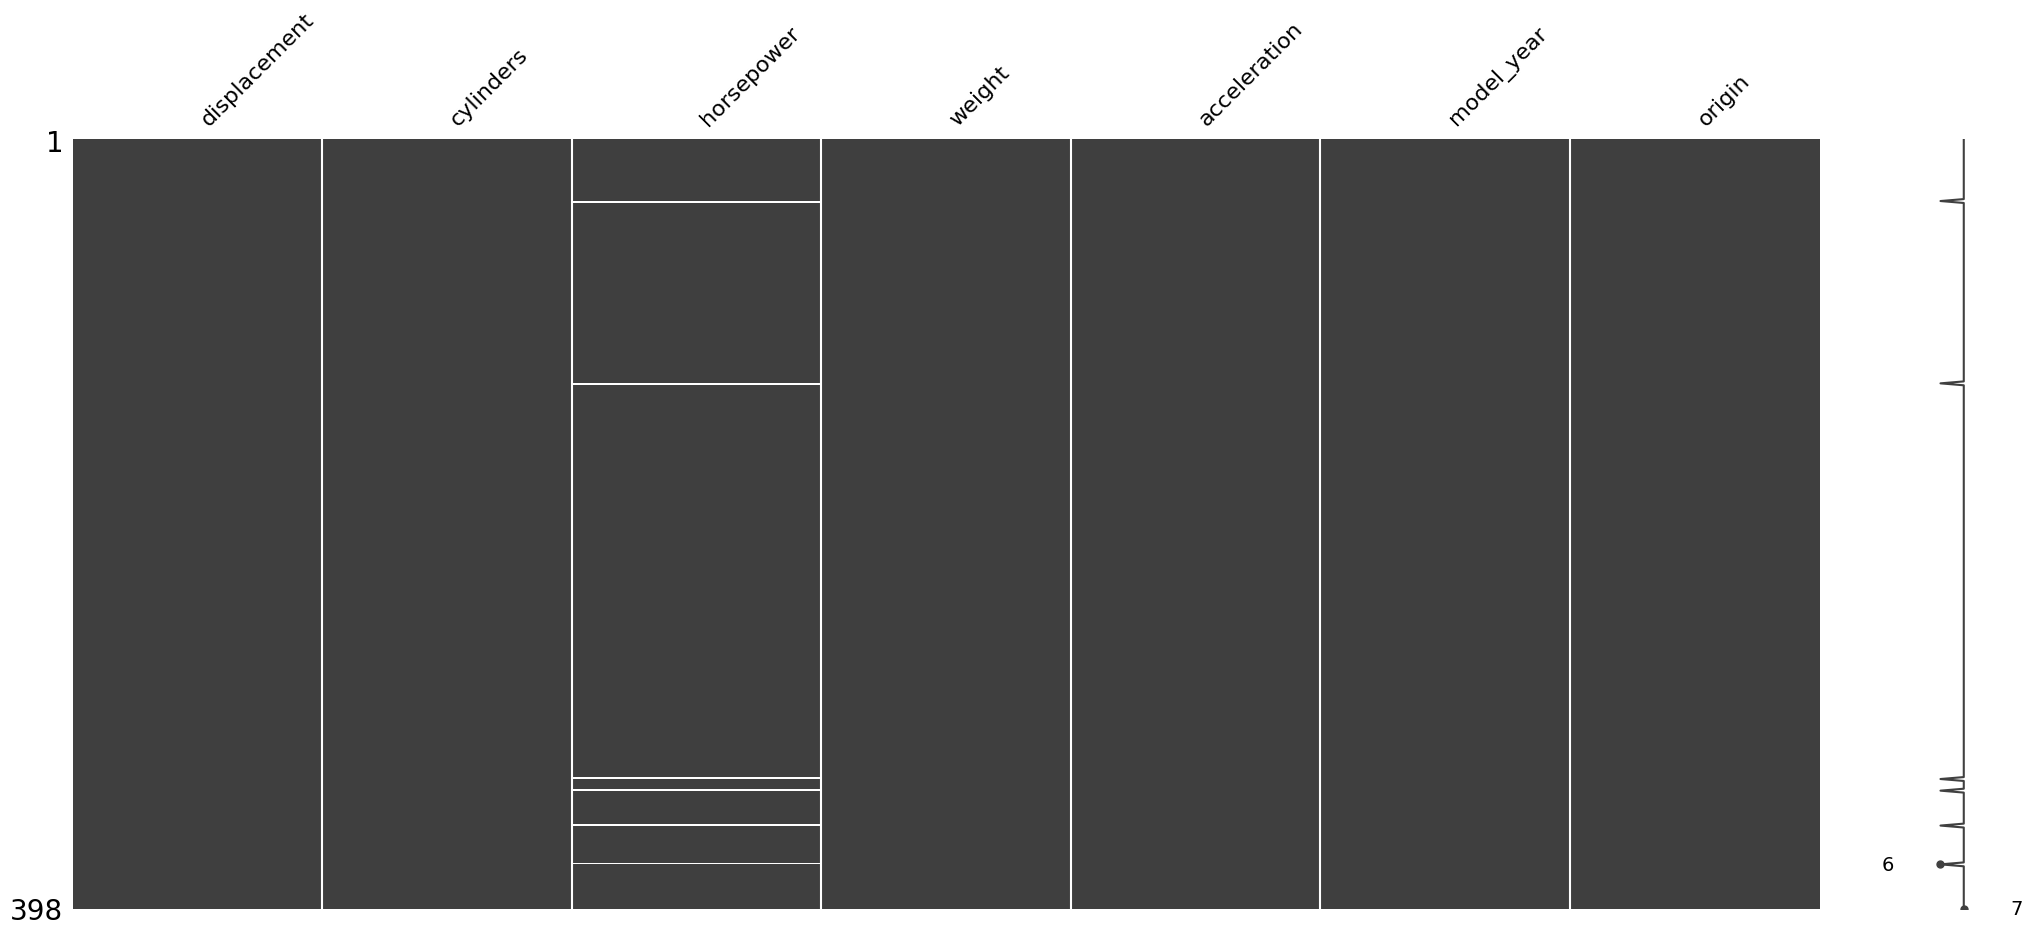

In [7]:
import missingno as msno
msno.matrix(X)

In [14]:
X[X.isna().any(axis=1)]

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
32,98.0,4,NaN,2046,19.0,71,1
126,200.0,6,NaN,2875,17.0,74,1
330,85.0,4,NaN,1835,17.3,80,2
336,140.0,4,NaN,2905,14.3,80,1
354,100.0,4,NaN,2320,15.8,81,2
374,151.0,4,NaN,3035,20.5,82,1


In [17]:
# 1 결측치를 제거한다.
# X.dropna(inplace=True)

# 2.결측치를 채운다(평균)
# X.fillna(X.mean(),inplace=True)

# 3. cylinders별로 평균을 구해서 채운다
X.fillna(X.groupby('cylinders').mean(),inplace=True)


<ipython-input-17-89e3b66a3dd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
<ipython-input-17-89e3b66a3dd4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(),inplace=True)
<ipython-input-17-89e3b66a3dd4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2 = X.fillna(X.groupby('cylinders').mean(),inplace=True)
